## Quantum Hough Transform with a Simple Detector

In this notebook, we are generating track parameters for a Simple Model of ATLAS Inner Detector with 10 layers, which are spaced equidistant in the range (-1000, 1000).

In [19]:
#################################################################################
# Objective: Generate Classical and Quantum Hough Space
# Input: N/A.
# Output: Reconstructed Tracks using Quantum Hough Transform
# Author: Amitabh Yadav, M.Sc.
# Duration: November 2019 - April, 2020
################################################################################
    
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

### Create Detector and Tracks

In [20]:
def plot_detector_layers():
    ###################################################################################################
    # Function: Generates a simple detector with 10 layers spaced equidistant in the range(-1000,1000)
    # Input: N/A
    # Output: Plots the circular layers of the ATLAS Inner Detector
    ###################################################################################################
    layer_1 = plt.Circle((0, 0), 100, color='gray', linewidth=.1, fill=False)
    layer_2 = plt.Circle((0, 0), 200, color='gray', linewidth=.1, fill=False)
    layer_3 = plt.Circle((0, 0), 300, color='gray', linewidth=.1, fill=False)
    layer_4 = plt.Circle((0, 0), 400, color='gray', linewidth=.1, fill=False)
    layer_5 = plt.Circle((0, 0), 500, color='gray', linewidth=.1, fill=False)
    layer_6 = plt.Circle((0, 0), 600, color='gray', linewidth=.1, fill=False)
    layer_7 = plt.Circle((0, 0), 700, color='gray', linewidth=.1, fill=False)
    layer_8 = plt.Circle((0, 0), 800, color='gray', linewidth=.1, fill=False)
    layer_9 = plt.Circle((0, 0), 900, color='gray', linewidth=.1, fill=False)
    layer_10 = plt.Circle((0, 0), 1000, color='gray', linewidth=.1, fill=False)
   
    fig, ax = plt.subplots(num=None, figsize=(6,6), dpi=80) # with an existing figure # fig = plt.gcf() # ax = fig.gca()
    
    # change default range so that new circles will work
    ax.set_xlim((-1100, 1100))
    ax.set_ylim((-1100, 1100))
    
    #plot layers
    ax.add_artist(layer_1)
    ax.add_artist(layer_2)
    ax.add_artist(layer_3)
    ax.add_artist(layer_4)
    ax.add_artist(layer_5)
    ax.add_artist(layer_6)
    ax.add_artist(layer_7)
    ax.add_artist(layer_8)
    ax.add_artist(layer_9)
    ax.add_artist(layer_10)
    fig.savefig('plotcircles.png')
    
def get_track_coordinates():
    #####################################################################################################
    # Function: Plot Cylindrical Space
    # Input: R and Phi cylindrical coordinates of tracks, expressed as a python List.
    # Output: Scatter Plot
    # Remarks: The values for different tracks can be generated using: https://www.desmos.com/calculator
    #####################################################################################################
    # Method 1: Generate tracks from discrete data. The following data is for 10 circular tracks.
    
    track_val_x = [5, 20, 45, 80, 125, 180, 245, 320, 405, 500,
                  8.333, 33.333, 75, 133.333, 208.333, 300, 408.333, 533.333, 675, 833.333,
                  99.745, 197.949, 293.031, 383.329, 467.025, 542.105, 606.218, 656.521, 689.387, 699.854,
                  99.875, 198.997, 296.606, 391.918, 484.123, 572.364, 655.725, 733.212, 803.726, 866.025,
                  -0.714, -2.857, -6.429, -11.429, -17.857, -25.714, -35, -45.714, -57.857, -71.429,
                  -7.143, -28.571, -64.286, -114.286, -178.571, -257.143, -350, -457.143, -578.571, -714.286,
                 -7.143, -28.571, -64.286, -114.286, -178.571, -257.143, -350, -457.143, -578.571, -714.286,
                  0.714, 2.857, 6.429, 11.429, 17.857, 25.714, 35, 45.714, 57.857, 71.429,
                  4, 16, 36, 64, 100, 144, 196, 256, 324, 400,
                  9.091, 36.364, 81.818, 145.455, 227.273, 327.273, 445.455, 581.818, 736.364, 909.091]
    
    track_val_y = [99.875, 198.997, 296.606, 391.918, 484.123, 572.364, 655.725, 733.212, 803.726, 866.025,
                  99.625, 197.203, 290.474, 377.124, 454.530, 519.615, 568.563, 596.285, 595.294, 552.771,
                  7.143, 28.571, 64.286, 114.286, 178.571, 257.143, 350, 457.143, 578.571, 714.286,
                  5, 20, 45, 80, 125, 180, 245, 320, 405, 500,
                  99.997, 199.980, 299.931, 399.837, 499.681, 599.449, 699.124, 798.693, 898.138, 997.446,
                  99.745, 197.949, 293.031, 383.329, 467.025, 542.105, 606.218, 656.521, 689.387, 699.854,
                  -99.745, -197.949, -293.031, -383.329, -467.025, -542.105, -606.218, -656.521, -689.387, -699.854,
                  -99.997, -199.980, -299.931, -399.837, -499.681, -599.449, -699.124, -798.693, -898.138, -997.446,
                  -99.92, -199.359, -297.832, -394.847, -489.898, -582.464, -672, -757.934, -839.657, -916.515,
                  -99.586, -196.666, -288.627, -372.616, -445.362, -502.884, -539.972, -549.079, -517.464, -416.598]
    
    # Method 2: Generate tracks from equation of a circle.
    # Not Required, here. For implementation, refer to the notebook: QHT-classical-pre-processing
    
    return track_val_x, track_val_y

def plot_tracks_from_array(x, y):
    #################################################################################
    # Function: Plot Cartesian Space
    # Input: X and Y cartesian coordinates of tracks, expressed as a python List.
    # Output: Scatter Plot
    ################################################################################
    plt.scatter(x,y,s=10)
    #plt.grid(b=True, which='major', axis='both', color='green', linestyle='-', linewidth=0.1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

### Running Classical Hough Transform

In [21]:
def cartesian_to_cylindrical(x, y):
    ###################################################################
    # Function: Convert from Cartesian Space to Cylindrical Space
    # Input: x and y coordinates of tracks, expressed as a python List.
    # Output: Cylindrical Coordinates of the tracks.
    ###################################################################
    r=[]
    phi=[]
    for n in range(len(x)):
        r.append(np.sqrt(x[n]**2 + y[n]**2))
        phi.append(np.arctan2(y[n], x[n]))
    return r, phi

def plot_cylindrical_coordinates(r,phi):
    #################################################################################
    # Function: Plot Cylindrical Space
    # Input: R and Phi cylindrical coordinates of tracks, expressed as a python List.
    # Output: Scatter Plot of R vs Phi
    ################################################################################
    plt.figure(num=None, figsize=(6,6), dpi=80)
    plt.scatter(r, phi, s=10)
    plt.grid(b=True, which='major', axis='both', color='green', linestyle='-', linewidth=0.1)
    plt.xlabel('R')
    plt.ylabel('Phi')
    plt.show()
    
def conformal_mapping(x,y):
    #######################################################################################
    # Function: Perform Conformal Mapping and Plot lines for the given circular track hits.
    # Input: Hits - x and y cartesian coordinates of tracks, expressed as a python List.
    # Output: u = x/(x^2 + y^2)
    #         v = y/(x^2 + y^2)
    #         Scatter Plot of u vs v
    ######################################################################################
    rhit_squared=np.zeros((len(x)))
    xp = np.zeros((len(x)))
    yp = np.zeros((len(x)))
    for n in range((len(x))):
        rhit_squared[n] = (x[n]**2 + y[n]**2)
        if rhit_squared[n]:
            xp[n] = x[n] / rhit_squared[n]
            yp[n] = y[n] / rhit_squared[n]
        else:
            xp[n] = 0
            yp[n] = 0
            rhit_squared = 0
            
    # Plot conformal mapping parameters        
    plt.figure(num=None, figsize=(6,6), dpi=80)
    plt.scatter(xp, yp, s=10)
    plt.grid(b=True, which='major', axis='both', color='green', linestyle='-', linewidth=0.1)
    plt.xlabel('u')
    plt.ylabel('v')
    plt.show()
    
    return xp, yp, rhit_squared

def rho_calculation(rhit_squared, xp, yp, phi):
    r = (xp * np.cos(phi) + yp * np.sin(phi))
    return r

def rho_phi(rhit_squared, xp, yp, numpoints):
    phis = np.linspace(0, 2*np.pi, numpoints)
    rhos = []              # [rho(rhit_squared, xp, yp, phi) for phi in phis]
    phis_return = []
    for phi in phis:
        rho = rho_calculation(rhit_squared, xp, yp, phi)
        if (rho>=0):
            phis_return.append(phi)
            rhos.append(rho)
    return phis_return, rhos

def classical_hough_transform(xp, yp, rhit_squared, numpoints, binx, biny, save_path):
    ############################################################################################
    # Function: Construct Accumulator Matrix and Plot Hough Space.
    # Input: Conformal Mapping u and v, of tracks expressed as a python List.
    # Output: Accumulator Matrix, Theta and Rho    
    ############################################################################################
    
    # Define Ranges --- thetas means phi
    ht_phi = []
    ht_rho = []
    
    for i in range(0, len(xp)):
        phis, rhos = rho_phi(rhit_squared[i], xp[i], yp[i], numpoints)
        ht_phi.extend(phis)
        ht_rho.extend(rhos)
        
    #print("min rho: ", min(ht_rho))
    #print("max rho: ", max(ht_rho))
    
    #set_range=[[0, 2*np.pi], [-100, max(ht_rho)]]
    set_range=[[0, 2*np.pi], [min(ht_rho), max(ht_rho)]]
    print("set range: ", set_range)

    #H, xedges, yedges = np.histogram2d(ht_phi, ht_rho, bins = (binx, biny), range=set_range)
    #print(H, "\n\n")
    #print("xedge: ", xedges.shape)
    #print("yedge: ", yedges.shape)
    
    #Vote in the hough accumulator
    bx = (set_range[0][1]-set_range[0][0])/binx
    by = (set_range[1][1]-set_range[1][0])/biny
    
    
    
    ############################################################################################
    # Plot Hough Space
    ############################################################################################
    plt.figure(figsize=(9,6))
    h = plt.hist2d(ht_phi, ht_rho, bins=(binx, biny), cmap='jet', range=set_range)
           #print(h[2])
    plt.colorbar(h[3])
    plt.xlabel(r'$\phi$ [rad]')
    plt.ylabel(r'$\rho$ [1/mm]')
    plt.title('Hough Space')
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
    return h


### Quantum Subroutines

In [22]:
def hough_space_resizing(X, Y, rho, phi, hough_matrix):
    ###################################################################################
    # Function: Construct Accumulator Matrix/Hough Space for Circular Tracks.
    # Input: x, y, rho and phi coordinates.
    # Output: Accumulator Matrix.
    # Remarks: Can be done on a quantum processor.
    #       Current Approaches: Quantum Counting, Quantum Maximum and Minimum using 
    #       Grovers-Long Algorithm.
    # Note: The Hough tranform for Lines can probably work using HHL Algorithm by using 
    #       conformal transform for 2D tracks. Can it also work for Circular Hough 
    #       Transform for 3D tracks and the 5 parameters?
    ##################################################################################
    
    pass
    
def construct_quantum_hough_space(X, Y, rho, phi,hough_matrix):
    ###################################################################################
    # Function: Construct Accumulator Matrix/Hough Space for Circular Tracks.
    # Input: x, y, rho and phi coordinates.
    # Output: Accumulator Matrix.
    # Remarks: Can be done on a quantum processor.
    #       Current Approaches: Quantum Counting, Quantum Maximum and Minimum using 
    #       Grovers-Long Algorithm.
    # Note: The Hough tranform for Lines can probably work using HHL Algorithm by using 
    #       conformal transform for 2D tracks. Can it also work for Circular Hough 
    #       Transform for 3D tracks and the 5 parameters?
    ##################################################################################
    
    # The accumulator matrix has 3 Dimensions (a, b, r): (a, b) denote the center while r denotes the radius
    # For complex shapes, multiples parameters can be added which increases the dimensionality of 
    # accumulator state space. Exponential storage by storing the variables in superposition is the 
    # targeted solution here.

    # Set up your Quantum Register (number of qubits) and,
    # Classical Register (Number of measurement registers to store the result)
    creg = ClassicalRegister(8)
    qreg = QuantumRegister(8)   
    qc = QuantumCircuit(qreg, creg)
    
    # Quantum Circuit Description
    J = 12 #number of iterations

    backend = qiskit.BasicAer.get_backend('qasm_simulator')

    from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx

    for n in range(J):
        #def W_operator():
        qc.h(qreg[0])
        qc.h(qreg[1])
        qc.h(qreg[2])
        qc.h(qreg[3])
        qc.h(qreg[4])
        qc.h(qreg[5])
        qc.h(qreg[6])
        qc.h(qreg[7])

        #def O_operator():
        qc.x(qreg[0])
        qc.u1(phi_tilda, qreg[0])
        qc.x(qreg[0])
        qc.x(qreg[1])
        qc.cu1(phi_tilda,qreg[0], qreg[1]) #approximated values of \phi
        qc.x(qreg[1])

        #def W_inverse_operator():   #just use the default inverse() function to make W^-1 operartor
        qc.h(qreg[0])
        qc.h(qreg[1])
        qc.h(qreg[2])
        qc.h(qreg[3])
        qc.h(qreg[4])
        qc.h(qreg[5])
        qc.h(qreg[6])
        qc.h(qreg[7])

        #def Io_operator():
        qc.x(qreg[0])
        qc.x(qreg[1])
        qc.x(qreg[2])
        qc.x(qreg[3])
        qc.x(qreg[4])
        qc.x(qreg[5])
        qc.x(qreg[6])
        qc.x(qreg[7])
        qc.mcu1(phi_tilda, qreg[0:6], qreg[7]) #multi-control phase
        qc.x(qreg[0])
        qc.x(qreg[1])
        qc.x(qreg[2])
        qc.x(qreg[3])
        qc.x(qreg[4])
        qc.x(qreg[5])
        qc.x(qreg[6])
        qc.x(qreg[7])

        #def W_operator():
        qc.h(qreg[0])
        qc.h(qreg[1])
        qc.h(qreg[2])
        qc.h(qreg[3])
        qc.h(qreg[4])
        qc.h(qreg[5])
        qc.h(qreg[6])
        qc.h(qreg[7])

    qc.draw(output='mpl', filename='output.png')
    
    #Measure Circuit
    qc.measure(q,c) # Qubits measured                            

    # Simulate the Quantum Circuit to execute on the Local simulator
    #job = qiskit.execute( qc, qiskit.BasicAer.get_backend('qasm_simulator'))
    
               
    # View the result
    #result = job.result()
    #counts = result.get_counts(qc)

    #print('Measurement Result: ',counts,'\n')
    
    # Execute and see results
    emulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, emulator, shots=8192 )
    hist = job.result().get_counts()
    print('Measurement Result: ',hist,'\n')
    plot_histogram(hist)
    
    #Run on Quantum Hardware
    #qiskit.IBMQ.load_accounts()
    #backend = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))
    #print("Using the least busy device:",backend.name())
    #job = qiskit.execute( qc, backend )
    #print( job.result().get_counts() )
    return counts

def quantum_maxima_finding():
    # Define Quantum Maxima classical subroutine
    pass
    
    #Grovers Long Iterations for 8 qubits
    # Set up your Quantum Register (number of qubits) and,
    # Classical Register (Number of measurement registers to store the result)
    creg = ClassicalRegister(8)
    qreg = QuantumRegister(8)   
    qc = QuantumCircuit(qreg, creg)
    
    # Quantum Circuit Description
    J = 12 #number of iterations

    backend = qiskit.BasicAer.get_backend('qasm_simulator')

    #from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx

    for n in range(J):
        #def W_operator():
        qc.h(qreg[0])
        qc.h(qreg[1])
        qc.h(qreg[2])
        qc.h(qreg[3])
        qc.h(qreg[4])
        qc.h(qreg[5])
        qc.h(qreg[6])
        qc.h(qreg[7])

        #def O_operator():
        qc.x(qreg[0])
        qc.u1(phi_tilda, qreg[0])
        qc.x(qreg[0])
        qc.x(qreg[1])
        qc.cu1(phi_tilda,qreg[0], qreg[1]) #approximated values of \phi
        qc.x(qreg[1])

        #def W_inverse_operator():   #just use the default inverse() function to make W^-1 operartor
        qc.h(qreg[0])
        qc.h(qreg[1])
        qc.h(qreg[2])
        qc.h(qreg[3])
        qc.h(qreg[4])
        qc.h(qreg[5])
        qc.h(qreg[6])
        qc.h(qreg[7])

        #def Io_operator():
        qc.x(qreg[0])
        qc.x(qreg[1])
        qc.x(qreg[2])
        qc.x(qreg[3])
        qc.x(qreg[4])
        qc.x(qreg[5])
        qc.x(qreg[6])
        qc.x(qreg[7])
        qc.mcu1(phi_tilda, qreg[0:6], qreg[7]) #multi-control phase
        qc.x(qreg[0])
        qc.x(qreg[1])
        qc.x(qreg[2])
        qc.x(qreg[3])
        qc.x(qreg[4])
        qc.x(qreg[5])
        qc.x(qreg[6])
        qc.x(qreg[7])

        #def W_operator():
        qc.h(qreg[0])
        qc.h(qreg[1])
        qc.h(qreg[2])
        qc.h(qreg[3])
        qc.h(qreg[4])
        qc.h(qreg[5])
        qc.h(qreg[6])
        qc.h(qreg[7])

    qc.draw() #qc.draw(output='mpl', filename='output.png') ## error for too large quantum circuit.
    
    #Measure Circuit
    qc.measure(q,c) # Qubits measured                            

    # Simulate the Quantum Circuit to execute on the Local simulator
    #job = qiskit.execute( qc, qiskit.BasicAer.get_backend('qasm_simulator'))
    
               
    # View the result
    #result = job.result()
    #counts = result.get_counts(qc)

    #print('Measurement Result: ',counts,'\n')
    
    # Execute and see results
    emulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, emulator, shots=8192)
    hist = job.result().get_counts()
    print('Measurement Result: ',hist,'\n')
    plot_histogram(hist)
    
    #Run on Quantum Hardware
    #qiskit.IBMQ.load_accounts()
    #backend = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))
    #print("Using the least busy device:",backend.name())
    #job = qiskit.execute( qc, backend )
    #print( job.result().get_counts() )
    return counts

def quantum_track_ploting():
    return 0


### Main

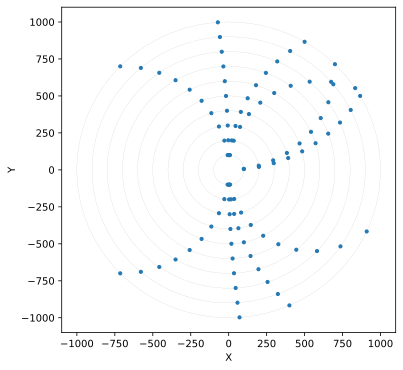

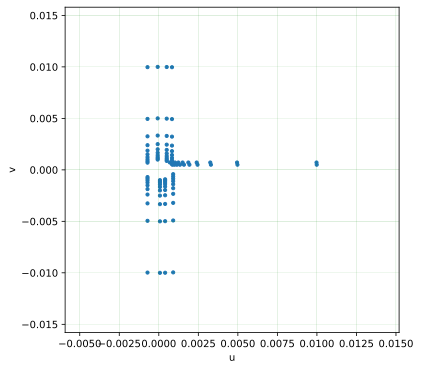

set range:  [[0, 6.283185307179586], [0.00020189221959299175, 999.9995897859678]]


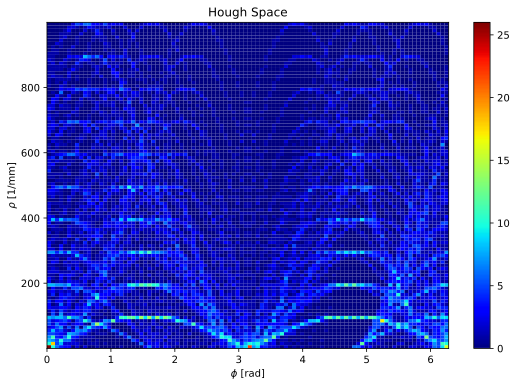

<class 'tuple'>
                                                   0
0  [[26.0, 10.0, 8.0, 7.0, 5.0, 4.0, 2.0, 5.0, 5....
1  [0.0, 0.06283185307179587, 0.12566370614359174...
2  [0.00020189221959299175, 10.000195771157076, 2...
3  <matplotlib.collections.QuadMesh object at 0x7...
                                                   0
0  [[26.0, 10.0, 8.0, 7.0, 5.0, 4.0, 2.0, 5.0, 5....
[[array([[26., 10.,  8., ...,  0.,  0.,  0.],
       [10., 18.,  7., ...,  0.,  0.,  0.],
       [ 6.,  5.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 5.,  5.,  5., ...,  0.,  0.,  0.],
       [ 9., 11.,  5., ...,  0.,  0.,  0.],
       [16., 10.,  7., ...,  0.,  0.,  0.]])], [array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482, 0.56548668,
       0.62831853, 0.69115038, 0.75398224, 0.81681409, 0.87964594,
       0.9424778 , 1.00530965, 1.0681415 , 1.13097336, 1.19380521,
       1.25663706, 1.31946891, 1.38230077, 1.44513262, 1.507964

In [23]:
def main():
    plot_detector_layers() #optional subroutine
    x, y = get_track_coordinates()
    plot_tracks_from_array(x, y)
    r, phi = cartesian_to_cylindrical(x, y) #r = (x^2 + y^2) and phi = tan^-1(y/x)
    #plot_cylindrical_coordinates(r, phi)
    
    ## Experiemental Steps: Running Classical Transform on Simple Detector
    u, v, rho = conformal_mapping(x,y) # Note that, rho = r = (x^2 + y^2)
    c_map = np.array([u,v])            # c_map is a 2D array
    hough_matrix = classical_hough_transform(x, y, rho, numpoints=256, binx=100, biny = 100, save_path='output_10_tracks.png')
    #plt.imshow(np.transpose(hough_matrix))
    print(type(hough_matrix))
    h_matrix = pd.DataFrame(list(hough_matrix))
    print(h_matrix.head())
    #print(h_matrix.tail())
    print(h_matrix.loc[[0]])
    t = h_matrix.values.tolist()
    print(t)
    
    ## Quantum Subroutine Begin Here
    #construct_quantum_hough_space(x, y, r, phi, hough_matrix) ## IN PROGRESS.
    #labels = quantum_maxima_finding()   ## INCOMPLETE.
    #quantum_track_ploting()             ## INCOMPLETE.
    
if __name__== "__main__":
  main()